In [11]:
import google.datalab.bigquery as bq

In [12]:
query="""
SELECT *
FROM
  `bigquery-samples.airline_ontime_data.flights`
LIMIT 10;
"""

all_df = bq.Query(query).execute().result().to_dataframe()
all_df.head()

,date,airline,airline_code,departure_airport,departure_state,departure_lat,departure_lon,arrival_airport,arrival_state,arrival_lat,arrival_lon,departure_schedule,departure_actual,departure_delay,arrival_schedule,arrival_actual,arrival_delay
0,2006-08-20,KH,19678,HNL,HI,21.31,-157.92,KOA,HI,19.73,-156.04,1725,1723,-2.0,1806,1803,-3.0
1,2006-08-19,KH,19678,HNL,HI,21.31,-157.92,KOA,HI,19.73,-156.04,1725,1719,-6.0,1806,1757,-9.0
2,2006-08-18,KH,19678,HNL,HI,21.31,-157.92,KOA,HI,19.73,-156.04,1725,1724,-1.0,1806,1800,-6.0
3,2006-08-17,KH,19678,HNL,HI,21.31,-157.92,KOA,HI,19.73,-156.04,1725,1722,-3.0,1806,1802,-4.0
4,2006-08-16,KH,19678,HNL,HI,21.31,-157.92,KOA,HI,19.73,-156.04,1725,1719,-6.0,1806,1754,-12.0


In [3]:
query="""
SELECT
  departure_delay,
  COUNT(1) AS num_flights,
  APPROX_QUANTILES(arrival_delay, 10) AS arrival_delay_deciles
FROM
  `bigquery-samples.airline_ontime_data.flights`
GROUP BY
  departure_delay
HAVING
  num_flights > 100
ORDER BY
  departure_delay ASC
"""

df = bq.Query(query).execute().result().to_dataframe()
df.head()

,departure_delay,num_flights,arrival_delay_deciles
0,-37.0,107,"[-66.0, -44.0, -41.0, -35.0, -30.0, -23.0, -17..."
1,-36.0,139,"[-74.0, -43.0, -39.0, -37.0, -32.0, -25.0, -18..."
2,-35.0,191,"[-68.0, -45.0, -40.0, -36.0, -28.0, -19.0, -14..."
3,-34.0,195,"[-58.0, -44.0, -40.0, -35.0, -30.0, -25.0, -19..."
4,-33.0,227,"[-59.0, -43.0, -39.0, -36.0, -32.0, -28.0, -20..."


In [4]:
import pandas as pd
percentiles = df['arrival_delay_deciles'].apply(pd.Series)

In [7]:
percentiles.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-66.0,-44.0,-41.0,-35.0,-30.0,-23.0,-17.0,-12.0,-3.0,6.0,33.0
1,-74.0,-43.0,-39.0,-37.0,-32.0,-25.0,-18.0,-14.0,-7.0,2.0,49.0
2,-68.0,-45.0,-40.0,-36.0,-28.0,-19.0,-14.0,-8.0,-4.0,3.0,85.0
3,-58.0,-44.0,-40.0,-35.0,-30.0,-25.0,-19.0,-14.0,-8.0,2.0,39.0
4,-59.0,-43.0,-39.0,-36.0,-32.0,-28.0,-20.0,-14.0,-7.0,5.0,25.0


In [8]:
percentiles = percentiles.rename(columns = lambda x : str(x*10) + "%")
df = pd.concat([df['departure_delay'], percentiles], axis=1)
df.head()

,departure_delay,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%
0,-37.0,-66.0,-44.0,-41.0,-35.0,-30.0,-23.0,-17.0,-12.0,-3.0,6.0,33.0
1,-36.0,-74.0,-43.0,-39.0,-37.0,-32.0,-25.0,-18.0,-14.0,-7.0,2.0,49.0
2,-35.0,-68.0,-45.0,-40.0,-36.0,-28.0,-19.0,-14.0,-8.0,-4.0,3.0,85.0
3,-34.0,-58.0,-44.0,-40.0,-35.0,-30.0,-25.0,-19.0,-14.0,-8.0,2.0,39.0
4,-33.0,-59.0,-43.0,-39.0,-36.0,-32.0,-28.0,-20.0,-14.0,-7.0,5.0,25.0


Suppose we were creating a machine learning model to predict the arrival delay of a flight. Do you think departure delay is a good input feature? Is this true at all ranges of departure delays?

/usr/local/envs/py2env/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


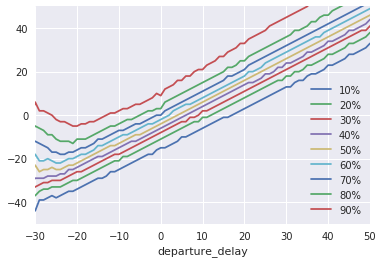

In [9]:
without_extremes = df.drop(['0%', '100%'], 1)
without_extremes.plot(x='departure_delay', xlim=(-30,50), ylim=(-50,50));

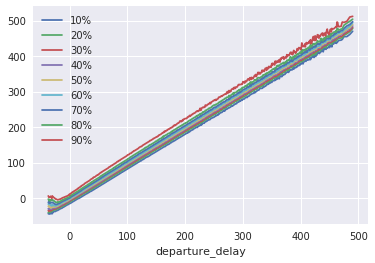

In [10]:
without_extremes = df.drop(['0%', '100%'], 1)
without_extremes.plot(x='departure_delay');